In [1]:
import datetime
import time
import math
import numpy as np
import pandas as pd
import sys

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import f_regression

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# PANDAS

## Video17

In [12]:
#Reading data from CSV
usda = pd.read_csv("USDA.csv")

FileNotFoundError: File b'USDA.csv' does not exist

In [3]:
usda

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5
5,1006,"CHEESE,BRIE",334.0,20.75,27.68,0.45,629.0,17.410,100.0,0.45,184.0,0.50,152.0,0.0,0.24,0.5
6,1007,"CHEESE,CAMEMBERT",300.0,19.80,24.26,0.46,842.0,15.259,72.0,0.46,388.0,0.33,187.0,0.0,0.21,0.4
7,1008,"CHEESE,CARAWAY",376.0,25.18,29.20,3.06,690.0,18.584,93.0,NaN,673.0,0.64,93.0,0.0,NaN,NaN
8,1009,"CHEESE,CHEDDAR",403.0,24.90,33.14,1.28,621.0,21.092,105.0,0.52,721.0,0.68,98.0,0.0,0.29,0.6
9,1010,"CHEESE,CHESHIRE",387.0,23.37,30.60,4.78,700.0,19.475,103.0,NaN,643.0,0.21,95.0,0.0,NaN,NaN


In [4]:
#Exploring the dataframe. Print basic stats.
#Conclusion Here: There are lots of columns with outliers as there is huge difference between max and 75% values

print(usda.head())
print(usda.describe())
print(usda.columns)

     ID               Description  Calories  Protein  TotalFat  Carbohydrate  \
0  1001          BUTTER,WITH SALT     717.0     0.85     81.11          0.06   
1  1002  BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11          0.06   
2  1003      BUTTER OIL,ANHYDROUS     876.0     0.28     99.48          0.00   
3  1004               CHEESE,BLUE     353.0    21.40     28.74          2.34   
4  1005              CHEESE,BRICK     371.0    23.24     29.68          2.79   

   Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  Potassium  \
0   714.0        51.368        215.0   0.06     24.0  0.02       24.0   
1   827.0        50.489        219.0   0.06     24.0  0.16       26.0   
2     2.0        61.924        256.0   0.00      4.0  0.00        5.0   
3  1395.0        18.669         75.0   0.50    528.0  0.31      256.0   
4   560.0        18.764         94.0   0.51    674.0  0.43      136.0   

   VitaminC  VitaminE  VitaminD  
0       0.0      2.32       1.5  
1       0.0 

In [5]:
#Check the datatypes of the columns
print(usda.dtypes)

ID                int64
Description      object
Calories        float64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium          float64
SaturatedFat    float64
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium       float64
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object


In [6]:
#Print the number of rows and columns in the dataframe
usda.shape

(7058, 16)

In [7]:
#Have a view of the values in the dataframe. Better will beto use head()
usda.info

<bound method DataFrame.info of          ID                                        Description  Calories  \
0      1001                                   BUTTER,WITH SALT     717.0   
1      1002                           BUTTER,WHIPPED,WITH SALT     717.0   
2      1003                               BUTTER OIL,ANHYDROUS     876.0   
3      1004                                        CHEESE,BLUE     353.0   
4      1005                                       CHEESE,BRICK     371.0   
5      1006                                        CHEESE,BRIE     334.0   
6      1007                                   CHEESE,CAMEMBERT     300.0   
7      1008                                     CHEESE,CARAWAY     376.0   
8      1009                                     CHEESE,CHEDDAR     403.0   
9      1010                                    CHEESE,CHESHIRE     387.0   
10     1011                                       CHEESE,COLBY     394.0   
11     1012                CHEESE,COTTAGE,CRMD,LRG OR SM

In [8]:
#Get the count of non-missing values in each column
usda.count()

ID              7058
Description     7058
Calories        7057
Protein         7057
TotalFat        7057
Carbohydrate    7057
Sodium          6974
SaturatedFat    6757
Cholesterol     6770
Sugar           5148
Calcium         6922
Iron            6935
Potassium       6649
VitaminC        6726
VitaminE        4338
VitaminD        4224
dtype: int64

In [11]:
#Get the count of missing values in each column
usda.isnull().sum()

ID                 0
Description        0
Calories           1
Protein            1
TotalFat           1
Carbohydrate       1
Sodium            84
SaturatedFat     301
Cholesterol      288
Sugar           1910
Calcium          136
Iron             123
Potassium        409
VitaminC         332
VitaminE        2720
VitaminD        2834
dtype: int64

In [13]:
#Just a validation: Non-missing + missing equals the count. Not required but doing in learning phase.
usda.count()+usda.isnull().sum()

ID              7058
Description     7058
Calories        7058
Protein         7058
TotalFat        7058
Carbohydrate    7058
Sodium          7058
SaturatedFat    7058
Cholesterol     7058
Sugar           7058
Calcium         7058
Iron            7058
Potassium       7058
VitaminC        7058
VitaminE        7058
VitaminD        7058
dtype: int64

## Video 18

In [15]:
#We noticed that the max value of Sodium deviates highly from the daily intake value(2300). Doing further analysis for the same.

In [16]:
usda['Sodium']

0        714.0
1        827.0
2          2.0
3       1395.0
4        560.0
5        629.0
6        842.0
7        690.0
8        621.0
9        700.0
10       604.0
11       364.0
12       344.0
13       330.0
14       330.0
15       406.0
16       321.0
17       965.0
18      1116.0
19       800.0
20       600.0
21       819.0
22       336.0
23       800.0
24       536.0
25       627.0
26       415.0
27       619.0
28       652.0
29       628.0
         ...  
7028      10.0
7029      95.0
7030      57.0
7031      55.0
7032     856.0
7033     499.0
7034     490.0
7035      35.0
7036     260.0
7037     167.0
7038      16.0
7039     486.0
7040     711.0
7041       0.0
7042       2.0
7043    1297.0
7044    1435.0
7045    2838.0
7046       2.0
7047      12.0
7048       0.0
7049    3326.0
7050    1765.0
7051    4250.0
7052      29.0
7053      58.0
7054    4450.0
7055     667.0
7056      70.0
7057      68.0
Name: Sodium, Length: 7058, dtype: float64

In [17]:
usda.loc[usda['Sodium'].idxmax()]

ID                    2047
Description     SALT,TABLE
Calories                 0
Protein                  0
TotalFat                 0
Carbohydrate             0
Sodium               38758
SaturatedFat             0
Cholesterol              0
Sugar                    0
Calcium                 24
Iron                  0.33
Potassium                8
VitaminC                 0
VitaminE                 0
VitaminD                 0
Name: 264, dtype: object

In [ ]:
#Conclusion: The outlier makes sense as the food is table salt which has high sodium content.

In [26]:
HighSodium = usda[usda.Sodium > 10000]

In [27]:
HighSodium.shape

(10, 16)

In [31]:
usda[usda.Description.str.contains('CAVIAR')]

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
4153,15012,CAVIAR,264.0,24.6,17.9,4.0,1500.0,4.06,588.0,0.0,275.0,11.88,181.0,0.0,1.89,2.9


In [34]:
usda[usda.Description.str.contains('BANANA')]

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
1610,8110,"CEREALS,CRM OF WHEAT,MIX'N EAT,APPL,BANANA&MAP...",373.0,6.90,1.10,81.60,680.0,NaN,0.0,NaN,113.0,22.90,155.0,0.0,NaN,NaN
1611,8111,"CEREALS,CRM OF WHEAT,MIX'N EAT,APPL,BANANA&MAP...",88.0,1.60,0.30,19.30,161.0,0.044,0.0,NaN,27.0,5.40,37.0,0.0,NaN,NaN
1777,8417,"CEREALS,QUAKER,INST OATMEAL,BANANA BREAD,DRY",368.0,8.85,4.75,75.86,700.0,0.785,0.0,30.47,268.0,9.95,284.0,0.9,0.43,0.0
1871,8592,"CEREALS RTE,GENERAL MILLS,CHEERIOS,BANANA NUT",374.0,5.40,4.00,84.70,570.0,0.700,0.0,33.40,357.0,16.10,252.0,53.6,NaN,3.6
1885,8606,"CEREALS RTE,BEAR NAKED BANANA NUT",380.0,8.80,7.80,78.10,380.0,3.400,0.0,21.70,34.0,2.50,349.0,1.0,0.00,0.0
1901,8622,"CEREALS RTE,QUAKER,SIMPLE HARVEST MULTIGRAIN,B...",388.0,9.83,6.01,78.81,364.0,1.456,0.0,26.92,54.0,2.99,436.0,0.5,2.29,NaN
1962,9040,"BANANAS,RAW",89.0,1.09,0.33,22.84,1.0,0.112,0.0,12.23,5.0,0.26,358.0,8.7,0.10,0.0
1963,9041,"BANANAS,DEHYD,OR BANANA PDR",346.0,3.89,1.81,88.28,3.0,0.698,0.0,47.30,22.0,1.15,1491.0,7.0,0.39,0.0
3349,11976,"PEPPER,BANANA,RAW",27.0,1.66,0.45,5.35,13.0,0.048,0.0,1.95,14.0,0.46,256.0,82.7,0.69,0.0
3896,14087,"CAMPBELL SOUP COMPANY,V8 SPLASH SMOOTHIES,STRA...",37.0,1.22,0.00,8.16,29.0,0.000,0.0,7.35,41.0,0.15,24.0,24.5,NaN,NaN


In [35]:
usda.Sodium.describe()

count     6974.000000
mean       322.059220
std       1045.416931
min          0.000000
25%         37.000000
50%         79.000000
75%        386.000000
max      38758.000000
Name: Sodium, dtype: float64

In [36]:
usda.Sodium.isnull().sum()

84

In [37]:
usda.Sodium.std()

1045.4169311578748

## Video 19

In [38]:
import matplotlib.pyplot as plt

In [39]:
%matplotlib inline

In [40]:
import seaborn as sns

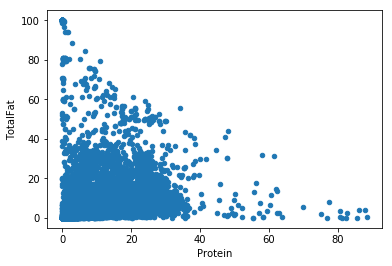

In [47]:
usda.plot(kind='scatter',x="Protein", y="TotalFat")

In [84]:
print(usda[usda['VitaminC'].isnull()])

         ID                                        Description  Calories  \
182    1210                                 EGG MIX,USDA CMDTY     555.0   
198    1227                        CHEESE,DRY WHITE,QUESO SECO     325.0   
200    1229                          CHEESE,WHITE,QUESO BLANCO     310.0   
404    4628  MARGARINE,80% FAT,STK,INCL REG & HYDR CORN & S...     717.0   
405    4629  MARGARINE, VEG OIL SPRD,70% FAT,SOYBN & PART H...     628.0   
441    4668  MARGARINE,INDUS,SOY & PART HYDR SOY OIL,BAKING...     714.0   
444    4673  MARGARINE-LIKE SPRD,SMART BALANCE REG BUTTERY ...     583.0   
445    4674  MARGARINE-LIKE SPRD,SMART BALANCE LT BUTTERY SPRD     337.0   
446    4675  MARGARINE-LIKE SPRD,SMART BEAT SUPER LT WO/ SA...     158.0   
447    4676       MARGARINE-LIKE SPRD,SMART BEAT SMART SQUEEZE      47.0   
448    4677  MARGARINE-LIKE SPRD,SMART BALANCE OMEGA PLUS SPRD     605.0   
451    4683  MARGARINE,MARGARINE-LIKE VEG OIL SPRD,67-70% F...     606.0   
452    4684 

In [86]:
usda['VitaminC'] = pd.to_numeric(usda['VitaminC'], errors='coerce')

In [87]:
usda = usda.dropna(subset=['VitaminC'])

In [88]:
usda['VitaminC'] = usda['VitaminC'].astype(int)

/opt/cloudera/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


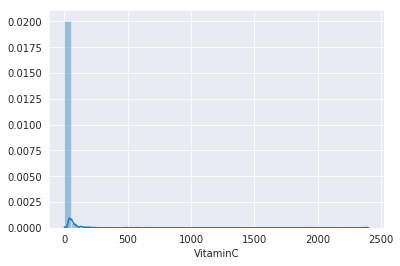

In [89]:
# Make default histogram of sepal length
sns.distplot(usda["VitaminC"])
#sns.plt.show()
 

 

In [ ]:
# Control the number of bins
sns.distplot( usda["VitaminC"], bins=20 )
#sns.plt.show()

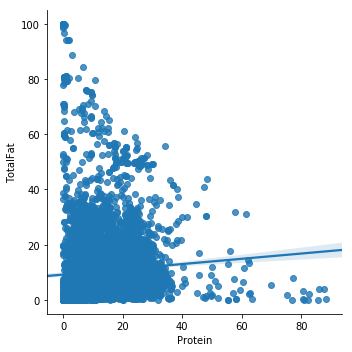

In [44]:
sns.lmplot("Protein", "TotalFat", data=usda)

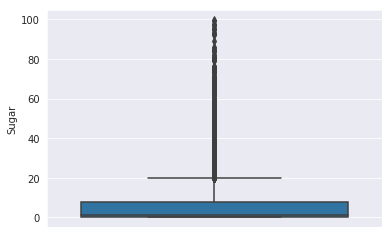

In [76]:

# Make boxplot for one group only
sns.boxplot(y=usda["Sugar"] )
#sns.plt.show()


## Video 20

In [90]:
# Higher/lower sodium then average

In [96]:
usda['Sodium'][1] > usda.Sodium.mean()

True

In [106]:
usda['Sodium'][3] > usda.Sodium.mean()

True

In [107]:
usda['HighSodium'] = (usda['Sodium'] > usda.Sodium.mean()).astype(int)

/opt/cloudera/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
usda['HighProtein'] = (usda['Protein'] > usda.Protein.mean()).astype(int)

/opt/cloudera/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
usda['HighFat'] = (usda['TotalFat'] > usda.TotalFat.mean()).astype(int)

/opt/cloudera/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
usda.dtypes

ID                int64
Description      object
Calories        float64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium          float64
SaturatedFat    float64
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium       float64
VitaminC          int64
VitaminE        float64
VitaminD        float64
HighSodium        int64
HighProtein       int64
HighFat           int64
dtype: object

In [114]:
usda.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,HighSodium,HighProtein,HighFat
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0,2.32,1.5,1,0,1
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0,2.32,1.5,1,0,1
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0,2.80,1.8,0,0,1
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0,0.25,0.5,1,1,1
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0,0.26,0.5,1,1,1


## Video 21

In [115]:
usda.HighSodium.value_counts()

0    4752
1    1974
Name: HighSodium, dtype: int64

In [117]:
usda1 = usda.groupby(['HighSodium', 'HighFat']).size()
usda1

HighSodium  HighFat
0           0          3431
            1          1321
1           0          1302
            1           672
dtype: int64

In [118]:
usda1.unstack()

HighFat,0,1
HighSodium,,
0,3431,1321
1,1302,672


In [120]:
cross = pd.crosstab(index=usda["HighSodium"], 
                             columns=usda["HighFat"],
                             margins=True)

cross

HighFat,0,1,All
HighSodium,,,
0,3431,1321,4752
1,1302,672,1974
All,4733,1993,6726


## Linear Regression : Video 22
#### https://bookdown.org/egarpor/PM-UC3M/intro-course.html - Must read
#### http://allisongadams.com/papers/wine_python.html

In [121]:
#SSE
#RMSE
#R square
#Total sum of squared - SSST
#R2 = 1-SSE/SST
#R2 = 0 , means no improvement over baseline
#R2 = 1 , means a perfect predictive model



In [122]:
#Selecting variables
#Overfitting


## Video 26

In [123]:
wine = pd.read_csv('wine.csv')

In [124]:
wine.describe()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1965.800000,7.067224,605.280000,16.509336,148.560000,17.200000,49694.436760
std,7.691987,0.650341,132.277965,0.675397,74.419464,7.691987,3665.270243
min,1952.000000,6.204900,376.000000,14.983300,38.000000,5.000000,43183.569000
25%,1960.000000,6.518800,536.000000,16.200000,89.000000,11.000000,46583.995000
50%,1966.000000,7.121100,600.000000,16.533300,130.000000,17.000000,50254.966000
75%,1972.000000,7.495000,697.000000,17.066700,187.000000,23.000000,52894.183000
max,1978.000000,8.493700,830.000000,17.650000,292.000000,31.000000,54602.193000


In [126]:
wine.columns

Index([u'Year', u'Price', u'WinterRain', u'AGST', u'HarvestRain', u'Age',
       u'FrancePop'],
      dtype='object')

In [127]:
wine.count()

Year           25
Price          25
WinterRain     25
AGST           25
HarvestRain    25
Age            25
FrancePop      25
dtype: int64

In [131]:
wine.shape

(25, 7)

## Single Variable Linear Regression

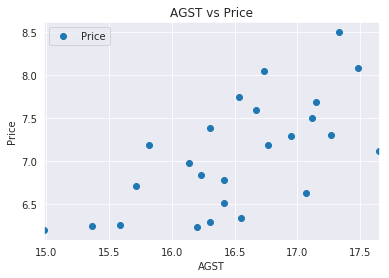

In [132]:
#Lets look at relation between Price and 'Average Growing Season Temperature(AGST)'
wine.plot(x='AGST', y='Price', style='o')  
plt.title('AGST vs Price')  
plt.xlabel('AGST')  
plt.ylabel('Price')  
plt.show()

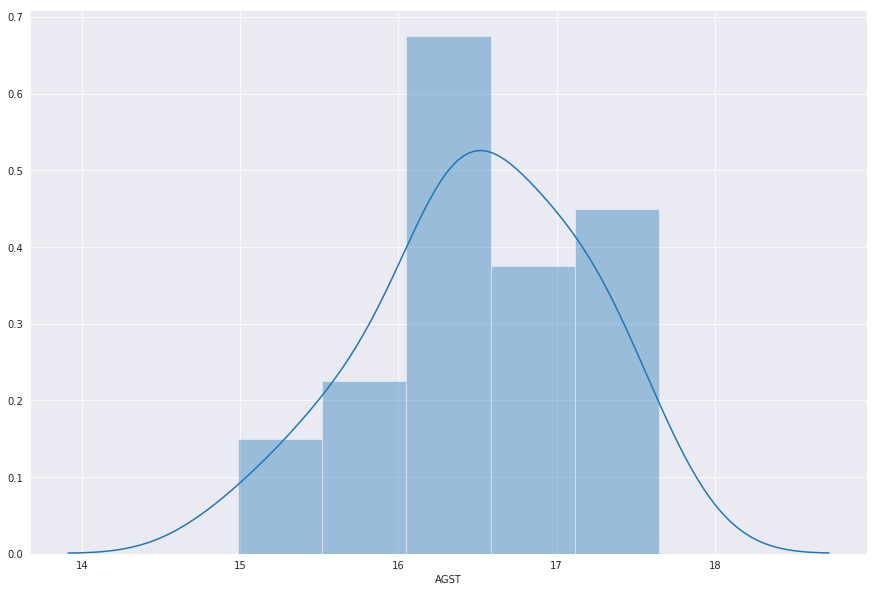

In [133]:
#Lets look at 'Average Growing Season Temperature(AGST)' distribution
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(wine['AGST'])

In [134]:
#R squared will always increas with the addition of new independant variable
#Adjusted R Squared takes into account number of independant variables and the data points. /
#If a new independant variable is added which is not affecting the model then the adjusted R squared will decrease.

In [149]:
#Taken all the data for model building

x = wine.AGST.values.reshape(-1,1)

In [137]:
y = wine.Price.values.reshape(-1,1)

In [138]:
regressor = LinearRegression()  
regressor.fit(x, y) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-3.41776131]
[[0.63509431]]


In [146]:
y_pred = regressor.predict(x)

In [147]:
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,7.4950,7.452957
1,8.0393,7.209462
2,7.6858,7.474106
3,6.9845,6.828406
4,6.7772,7.008391
5,8.0757,7.685783
6,6.5188,7.008391
7,8.4937,7.590519
8,7.3880,6.934276
9,6.7127,6.563825


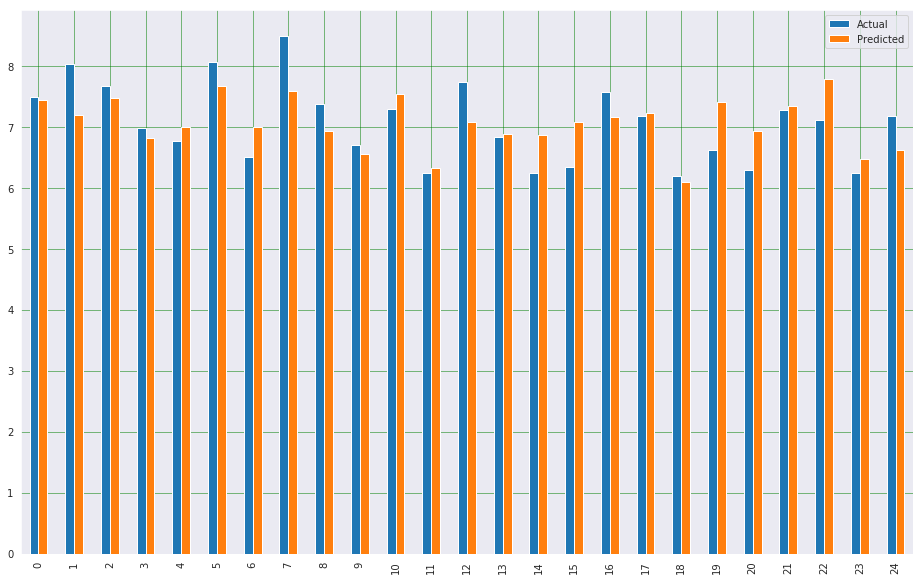

In [148]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

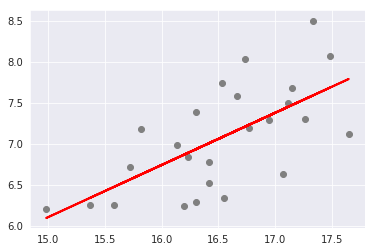

In [150]:
plt.scatter(x, y,  color='gray')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.show()

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:

Mean Absolute Error = 1/n (summation i=1 to n) abs(actual i - predicted i)

2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:

Mean Squared Error = 1/n (summation i=1 to n) abs(actual i - predicted i)squared

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

Root Mean Squared Error = sqrt(1/n (summation i=1 to n) abs(actual i - predicted i)squared)

In [153]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Squared Error:', metrics.r2_score(y, y_pred)) 

('Mean Absolute Error:', 0.39071000282576)
('Mean Squared Error:', 0.2293950058808046)
('Root Mean Squared Error:', 0.47895198703085534)
('R Squared Error:', 0.4350231677999199)


## Multiple Variable Linear Regression

In [154]:
#Check which columns have null values
wine.isnull().any()

Year           False
Price          False
WinterRain     False
AGST           False
HarvestRain    False
Age            False
FrancePop      False
dtype: bool

In [155]:
#If there are any missing values you can use fillna ffill to replace missing values with the previously available non missing value in the same column.
#dataset = dataset.fillna(method='ffill')

In [157]:
X = wine[['AGST', 'HarvestRain']].values
y = wine['Price'].values

In [167]:
X.reshape(-1,2)

array([[ 17.1167, 160.    ],
       [ 16.7333,  80.    ],
       [ 17.15  , 130.    ],
       [ 16.1333, 110.    ],
       [ 16.4167, 187.    ],
       [ 17.4833, 187.    ],
       [ 16.4167, 290.    ],
       [ 17.3333,  38.    ],
       [ 16.3   ,  52.    ],
       [ 15.7167, 155.    ],
       [ 17.2667,  96.    ],
       [ 15.3667, 267.    ],
       [ 16.5333,  86.    ],
       [ 16.2333, 118.    ],
       [ 16.2   , 292.    ],
       [ 16.55  , 244.    ],
       [ 16.6667,  89.    ],
       [ 16.7667, 112.    ],
       [ 14.9833, 158.    ],
       [ 17.0667, 123.    ],
       [ 16.3   , 184.    ],
       [ 16.95  , 171.    ],
       [ 17.65  , 247.    ],
       [ 15.5833,  87.    ],
       [ 15.8167,  51.    ]])

In [159]:
y

array([7.495 , 8.0393, 7.6858, 6.9845, 6.7772, 8.0757, 6.5188, 8.4937,
       7.388 , 6.7127, 7.3094, 6.2518, 7.7443, 6.8398, 6.2435, 6.3459,
       7.5883, 7.1934, 6.2049, 6.6367, 6.2941, 7.292 , 7.1211, 6.2587,
       7.186 ])

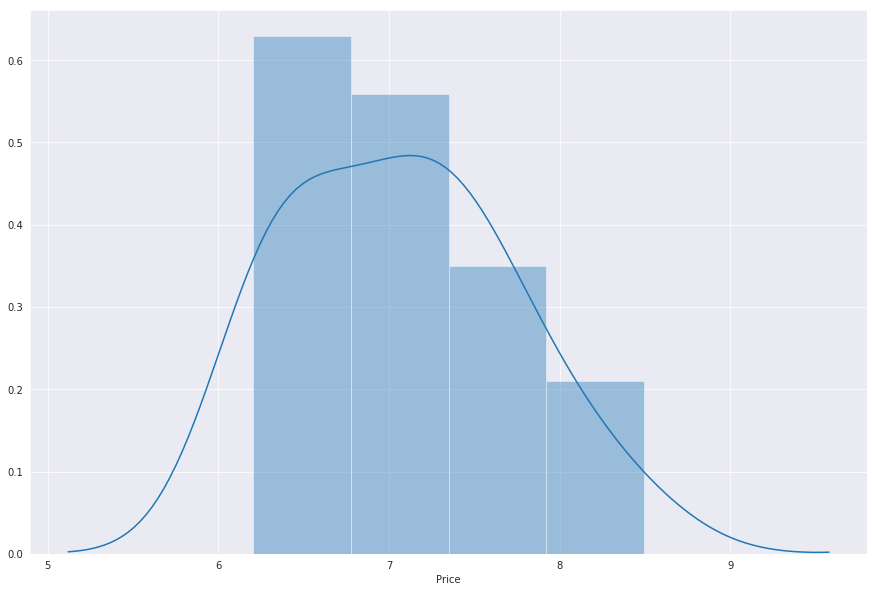

In [160]:
#Lets look at the distribution of Price
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(wine['Price'])

In [161]:
regressor = LinearRegression()  
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [171]:
coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'])  
coeff_df

,Coefficient
0,0.602617
1,-0.004570


In [172]:
y_pred = regressor.predict(X)

In [173]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = df.head(25)

In [174]:
df1

,Actual,Predicted
0,7.4950,7.380950
1,8.0393,7.515511
2,7.6858,7.538119
3,6.9845,7.016840
4,6.7772,6.835727
5,8.0757,7.478478
6,6.5188,6.365011
7,8.4937,8.069024
8,7.3880,7.382359
9,6.7127,6.560137


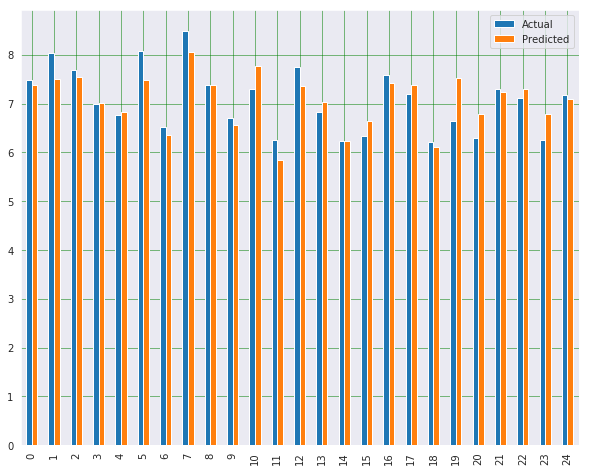

In [175]:
#Let's compare the actual and predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [178]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R Squared Error:', metrics.r2_score(y, y_pred))

('Mean Absolute Error:', 0.26682881719195)
('Mean Squared Error:', 0.1188149336069417)
('Root Mean Squared Error:', 0.34469542150562676)
('R Squared Error:', 0.7073707662049415)


In [192]:
SS_Residual = sum((y-y_pred)**2)
print "Sum Squared Errors: " + str(SS_Residual)

SS_Total = sum((y-np.mean(y))**2)
print "Sum Total Errors: " + str(SS_Total)

r_squared = 1 - (float(SS_Residual))/SS_Total
print "Sum R Squared: " + str(r_squared)

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print "Sum R Squared adjusted: " + str(adjusted_r_squared)

Sum Squared Errors: 2.970373340173543
Sum Total Errors: 10.1506377256
Sum R Squared: 0.7073707662049415
Sum R Squared adjusted: 0.680768108587209


## Linear Regression all variables

In [194]:
X = wine[['AGST', 'HarvestRain', 'WinterRain', 'Age', 'FrancePop']].values
y = wine['Price'].values

In [195]:
regressor = LinearRegression()  
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
print(regressor.coef_)

[ 6.01223884e-01 -3.95812450e-03  1.04250681e-03  5.84748489e-04
 -4.95273038e-05]


In [198]:
coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'])  
coeff_df

,Coefficient
0,0.601224
1,-0.003958
2,0.001043
3,0.000585
4,-0.000050


In [199]:
y_pred = regressor.predict(X)

In [200]:
y_pred

array([7.71213562, 7.87609138, 7.6957547 , 7.03071975, 7.03979179,
       7.55583208, 6.7735594 , 8.36440845, 7.50093262, 6.61400396,
       7.53645527, 5.9031736 , 7.5241781 , 7.08751791, 6.25075921,
       6.59251793, 7.3024093 , 7.17147181, 5.8780449 , 7.08005949,
       6.56581556, 6.9922508 , 6.94105535, 6.74048938, 6.95117163])

In [201]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = df.head(25)

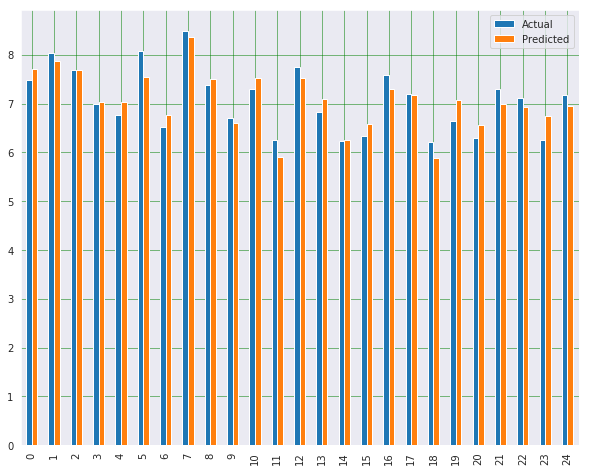

In [202]:
#Let's compare the actual and predicted values
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [203]:
SS_Residual = sum((y-y_pred)**2)
print "Sum Squared Errors: " + str(SS_Residual)

SS_Total = sum((y-np.mean(y))**2)
print "Sum Total Errors: " + str(SS_Total)

r_squared = 1 - (float(SS_Residual))/SS_Total
print "Sum R Squared: " + str(r_squared)

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print "Sum R Squared adjusted: " + str(adjusted_r_squared)

Sum Squared Errors: 1.7321127153438014
Sum Total Errors: 10.1506377256
Sum R Squared: 0.8293592223299037
Sum R Squared adjusted: 0.7844537545219836


## Video 27

Selecting the significant variable

In [205]:
f_regression(X, y, center=True)

(array([17.7096339 , 10.69131908,  0.43766015,  5.76783794,  6.41025253]),
 array([3.35049490e-04, 3.36632750e-03, 5.14827617e-01, 2.47969619e-02,
        1.86346214e-02]))

In [206]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           1.04e-06
Time:                        04:35:41   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4504     10.189     -0.044      0.9

In [242]:
X = wine[['AGST', 'HarvestRain', 'WinterRain', 'Age']].values
y = wine['Price'].values

regressor = LinearRegression()  
regressor.fit(X, y)

coeff_df = pd.DataFrame(regressor.coef_, columns=['Coefficient'])  
print "Coefficients" + str(coeff_df)

y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = df.head(25)
df1

Coefficients   Coefficient
0     0.607209
1    -0.003972
2     0.001076
3     0.023931


,Actual,Predicted
0,7.4950,7.715154
1,8.0393,7.872937
2,7.6858,7.677328
3,6.9845,7.003355
4,6.7772,7.019932
5,8.0757,7.539326
6,6.5188,6.757668
7,8.4937,8.363191
8,7.3880,7.513187
9,6.7127,6.630283


In [208]:
SS_Residual = sum((y-y_pred)**2)
print "Sum Squared Errors: " + str(SS_Residual)

SS_Total = sum((y-np.mean(y))**2)
print "Sum Total Errors: " + str(SS_Total)

r_squared = 1 - (float(SS_Residual))/SS_Total
print "Sum R Squared: " + str(r_squared)

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print "Sum R Squared adjusted: " + str(adjusted_r_squared)

Sum Squared Errors: 1.7401622013849811
Sum Total Errors: 10.1506377256
Sum R Squared: 0.8285662193424285
Sum R Squared adjusted: 0.7942794632109141


In [209]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.04e-07
Time:                        04:44:55   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4300      1.766     -1.942      0.0

## Video 27-28

## Correlation, value between -1 and +1. 



+1 = perfect +ve linear relationship
0 = no linear relationship
-1 = perfect negative linear relationship

In [215]:
corr = wine.corr()
corr

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


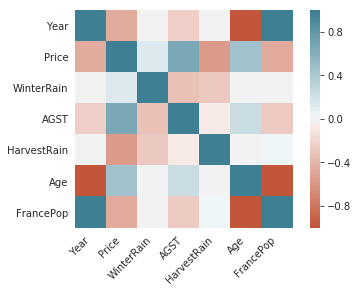

In [216]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [219]:
wine

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805
5,1959,8.0757,485,17.4833,187,24,46128.638
6,1960,6.5188,763,16.4167,290,23,46583.995
7,1961,8.4937,830,17.3333,38,22,47128.005
8,1962,7.3880,697,16.3000,52,21,48088.673
9,1963,6.7127,608,15.7167,155,20,48798.990


In [227]:
wine[['AGST','HarvestRain']].corr()

,AGST,HarvestRain
AGST,1.000000,-0.064496
HarvestRain,-0.064496,1.000000


In [228]:
type(wine)

pandas.core.frame.DataFrame

In [229]:
type(wine[['AGST','HarvestRain']])

pandas.core.frame.DataFrame

# Video 29
## Predictive Ability

In [231]:
wineTest = pd.read_csv('wine_test.csv')

In [232]:
wineTest.columns

Index([u'Year', u'Price', u'WinterRain', u'AGST', u'HarvestRain', u'Age',
       u'FrancePop'],
      dtype='object')

In [233]:
wineTest.dtypes

Year             int64
Price          float64
WinterRain       int64
AGST           float64
HarvestRain      int64
Age              int64
FrancePop      float64
dtype: object

In [236]:
predictTest = regressor.predict(wineTest[['AGST', 'HarvestRain', 'WinterRain', 'Age']])

In [243]:
X = wineTest[['AGST', 'HarvestRain', 'WinterRain', 'Age']].values
y = wineTest['Price'].values

y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,6.9541,6.768925
1,6.4979,6.684910


In [244]:
SS_Residual = sum((y-y_pred)**2)
print "Sum Squared Errors: " + str(SS_Residual)

SS_Total = sum((y-np.mean(y))**2)
print "Sum Total Errors: " + str(SS_Total)

r_squared = 1 - (float(SS_Residual))/SS_Total
print "Sum R Squared: " + str(r_squared)

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print "Sum R Squared adjusted: " + str(adjusted_r_squared)

Sum Squared Errors: 0.06926280848772584
Sum Total Errors: 0.10405922000000038
Sum R Squared: 0.3343904702752376
Sum R Squared adjusted: 1.2218698432415875


In [408]:
baseball = pd.read_csv('baseball.csv')

In [411]:
baseball.count()

Team            1232
League          1232
Year            1232
RS              1232
RA              1232
W               1232
OBP             1232
SLG             1232
BA              1232
Playoffs        1232
RankSeason       244
RankPlayoffs     244
G               1232
OOBP             420
OSLG             420
dtype: int64

In [409]:
moneyball = baseball[baseball.Year<2002]

In [412]:
moneyball.count()

Team            902
League          902
Year            902
RS              902
RA              902
W               902
OBP             902
SLG             902
BA              902
Playoffs        902
RankSeason      154
RankPlayoffs    154
G               902
OOBP             90
OSLG             90
dtype: int64

In [376]:
moneyball['RD'] = moneyball['RS'] - moneyball['RA']

/opt/cloudera/parcels/Anaconda-4.0.0/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [377]:
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [378]:
X = moneyball.RD.values.reshape(-1,1)
y = moneyball.W.values.reshape(-1,1)

In [384]:
regressor = LinearRegression(fit_intercept=True, normalize=False)
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [389]:
coeff_df = pd.DataFrame({'Coefficient':regressor.coef_[0] , 'Intercept':regressor.intercept_[0]})  
coeff_df

,Coefficient,Intercept
0,0.105766,80.881375


In [366]:
y_pred = regressor.predict(X)

In [367]:
df = pd.DataFrame({'Actual': y.tolist(), 'Predicted': y_pred.tolist()})
df1 = df.head(25)
df1

,Actual,Predicted
0,[75],[76.7565154473]
1,[92],[95.7943274882]
2,[88],[89.9772182535]
3,[63],[65.862656335]
4,[82],[83.737046529]
5,[88],[88.919562029]
6,[83],[81.1986715902]
7,[66],[68.7183281412]
8,[91],[88.919562029]
9,[73],[82.6793903045]


In [368]:
SS_Residual = sum((y-y_pred)**2)
print "Sum Squared Errors: " + str(SS_Residual)

SS_Total = sum((y-np.mean(y))**2)
print "Sum Total Errors: " + str(SS_Total)

r_squared = 1 - (float(SS_Residual))/SS_Total
print "Sum R Squared: " + str(r_squared)

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print "Sum R Squared adjusted: " + str(adjusted_r_squared)

Sum Squared Errors: [13964.77017789]
Sum Total Errors: [117164.30709534]
Sum R Squared: [0.88081037]
Sum R Squared adjusted: [0.88067794]


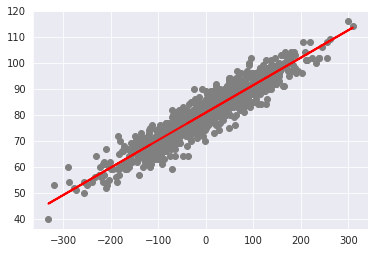

In [369]:
plt.scatter(X, y,  color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()

In [390]:
regressor.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [392]:
regressor.score(X, y)

0.8808103719972755

## Video 33

In [395]:
moneyball.describe()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,154.000000,154.000000,902.000000,90.000000,90.000000,902.000000
mean,1982.356984,703.809313,703.809313,80.881375,0.324961,0.390412,0.258153,0.170732,2.792208,2.454545,161.906874,0.340478,0.432500,0.000000
std,11.556504,93.314579,93.784100,11.403424,0.015391,0.033110,0.013266,0.376483,1.557924,1.016793,0.702127,0.015416,0.025658,101.188684
min,1962.000000,463.000000,472.000000,40.000000,0.277000,0.301000,0.214000,0.000000,1.000000,1.000000,158.000000,0.301000,0.377000,-331.000000
25%,1973.000000,641.250000,640.000000,73.000000,0.314000,0.368000,0.250000,0.000000,2.000000,2.000000,162.000000,0.329000,0.416000,-70.750000
50%,1983.000000,695.000000,697.000000,81.000000,0.324000,0.388000,0.258000,0.000000,2.500000,3.000000,162.000000,0.342000,0.432500,3.000000
75%,1992.000000,761.750000,763.000000,89.000000,0.335000,0.411750,0.267000,0.000000,4.000000,3.000000,162.000000,0.350000,0.450750,69.750000
max,2001.000000,1009.000000,1103.000000,116.000000,0.373000,0.485000,0.294000,1.000000,8.000000,4.000000,165.000000,0.384000,0.499000,309.000000


In [417]:
model1 = LinearRegression(fit_intercept=True)

In [422]:
model1.fit(moneyball[['OBP', 'SLG', 'BA']], moneyball[['RS']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [423]:
model1.coef_

array([[2917.42140821, 1637.92766577, -368.96606009]])

In [424]:
model1.intercept_

array([-788.45704708])

In [426]:
model1.score(moneyball[['OBP', 'SLG', 'BA']], moneyball[['RS']])

0.9302016258786281

In [427]:
moneyball.corr()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
Year,1.000000,0.485502,0.483072,0.002756,0.474799,0.517828,0.438729,0.113014,0.415645,0.426403,-0.027085,-0.335533,-0.122668
RS,0.485502,1.000000,0.415014,0.507382,0.904909,0.926384,0.831625,0.371631,0.135743,0.323624,0.056206,0.091057,0.039787
RA,0.483072,0.415014,1.000000,-0.507772,0.367105,0.459514,0.350411,-0.241213,0.539387,0.382416,-0.037402,0.909908,0.895110
W,0.002756,0.507382,-0.507772,1.000000,0.474080,0.405972,0.416391,0.588978,-0.747960,-0.235038,0.108128,-0.633657,-0.646920
OBP,0.474799,0.904909,0.367105,0.474080,1.000000,0.806154,0.854055,0.345530,0.146153,0.300446,-0.003827,0.052899,-0.008316
SLG,0.517828,0.926384,0.459514,0.405972,0.806154,1.000000,0.814068,0.300191,0.217315,0.341013,0.012873,0.101632,0.080376
BA,0.438729,0.831625,0.350411,0.416391,0.854055,0.814068,1.000000,0.278772,0.156881,0.229791,-0.001805,0.219021,0.231918
Playoffs,0.113014,0.371631,-0.241213,0.588978,0.345530,0.300191,0.278772,1.000000,NaN,NaN,0.009831,-0.495725,-0.510097
RankSeason,0.415645,0.135743,0.539387,-0.747960,0.146153,0.217315,0.156881,NaN,1.000000,0.352961,0.052870,0.141905,0.235886
RankPlayoffs,0.426403,0.323624,0.382416,-0.235038,0.300446,0.341013,0.229791,NaN,0.352961,1.000000,0.012394,0.299376,0.318576


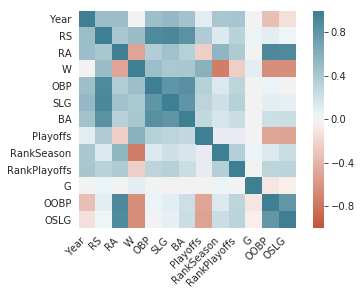

In [428]:
ax = sns.heatmap(
    moneyball.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Video 38: Moneyball in the NBA

In [3]:
NBA = pd.read_csv('NBA_train.csv')

In [5]:
NBA.count()

SeasonEnd    835
Team         835
Playoffs     835
W            835
PTS          835
oppPTS       835
FG           835
FGA          835
2P           835
2PA          835
3P           835
3PA          835
FT           835
FTA          835
ORB          835
DRB          835
AST          835
STL          835
BLK          835
TOV          835
dtype: int64

In [7]:
NBA.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


In [8]:
NBA.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


In [9]:
NBA.columns

Index([u'SeasonEnd', u'Team', u'Playoffs', u'W', u'PTS', u'oppPTS', u'FG',
       u'FGA', u'2P', u'2PA', u'3P', u'3PA', u'FT', u'FTA', u'ORB', u'DRB',
       u'AST', u'STL', u'BLK', u'TOV'],
      dtype='object')

In [16]:
NBA.Playoffs.value_counts()

1    480
0    355
Name: Playoffs, dtype: int64

In [18]:
NBA1 = NBA.groupby(['W', 'Playoffs']).size()
NBA1.unstack()

Playoffs,0,1
W,,
11,2.0,NaN
12,2.0,NaN
13,2.0,NaN
14,2.0,NaN
15,10.0,NaN
16,2.0,NaN
17,11.0,NaN
18,5.0,NaN
19,10.0,NaN


In [20]:
NBA2 = pd.crosstab(index=NBA["W"], 
                             columns=NBA["Playoffs"],
                             margins=True)

NBA2

#By looking at the table below, we can conclude that a team qualifies for the playoffs if it wins more than 41 games.

Playoffs,0,1,All
W,,,
11,2,0,2
12,2,0,2
13,2,0,2
14,2,0,2
15,10,0,10
16,2,0,2
17,11,0,11
18,5,0,5
19,10,0,10


In [21]:
NBA['PTSdiff'] = NBA['PTS'] - NBA['oppPTS']

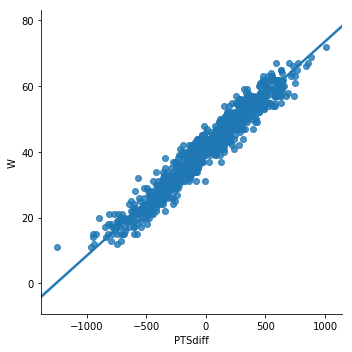

In [22]:
sns.lmplot("PTSdiff", "W", data=NBA)

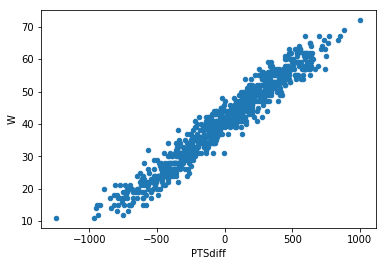

In [23]:
NBA.plot(kind='scatter',x="PTSdiff", y="W")

In [25]:
x = NBA.PTSdiff.values.reshape(-1,1)

In [26]:
y = NBA.W.values.reshape(-1,1)

In [27]:
model1 = LinearRegression()  
model1.fit(x, y) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
#To retrieve the intercept:
print(model1.intercept_)
#For retrieving the slope:
print(model1.coef_)

[41.]
[[0.03258633]]


In [31]:
y_pred = model1.predict(x)

In [32]:
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,50,48.788134
1,61,61.822667
2,30,33.765834
3,37,41.912417
4,30,29.203748
5,16,18.971639
6,24,29.268920
7,41,41.456209
8,37,39.142579
9,47,49.374688


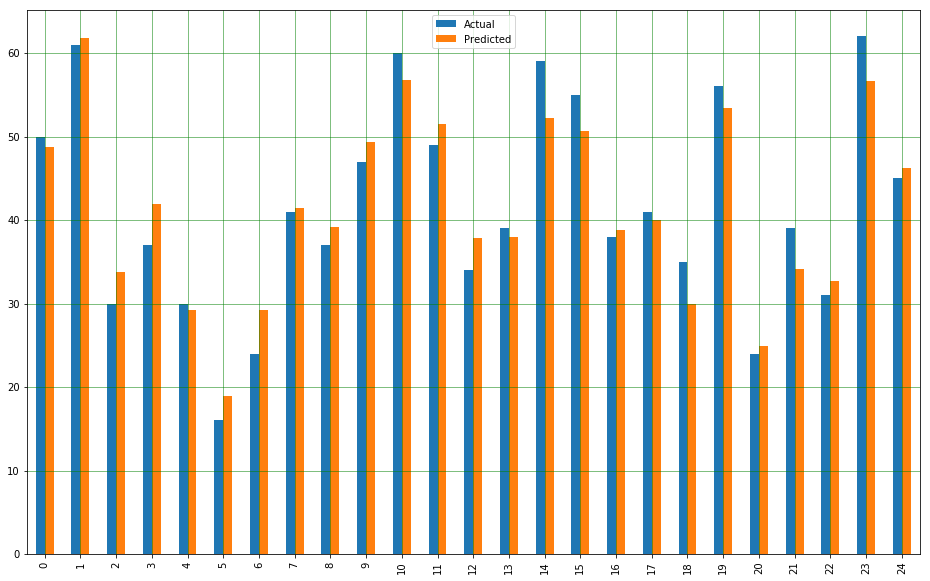

In [33]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [34]:
# So, our linear regression equation becomes
# W = 41 + 0.03258633 * PTSdiff
# We saw earlier, that a team has a higher chances of qualifying for the playoffs if it wins more that 42 games. By replacing W with 42, we get the value of PTSdiff as approx. 30.


In [36]:
NBA.columns

Index([u'SeasonEnd', u'Team', u'Playoffs', u'W', u'PTS', u'oppPTS', u'FG',
       u'FGA', u'2P', u'2PA', u'3P', u'3PA', u'FT', u'FTA', u'ORB', u'DRB',
       u'AST', u'STL', u'BLK', u'TOV', u'PTSdiff'],
      dtype='object')

In [39]:
X = NBA[['2PA', '3PA', 'FTA', 'AST', 'ORB', 'DRB', 'TOV', 'STL', 'BLK']].values
y = NBA['PTS'].values

PointsReg = LinearRegression()  
PointsReg.fit(X, y) #training the algorithm

y_pred = PointsReg.predict(X)
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,8573,8534.427729
1,9303,9160.127996
2,8813,8905.895718
3,9360,9368.391347
4,8878,9136.470561
5,8933,8761.539167
6,8493,8342.591838
7,9084,8914.618857
8,9119,9078.224380
9,8860,8935.325661


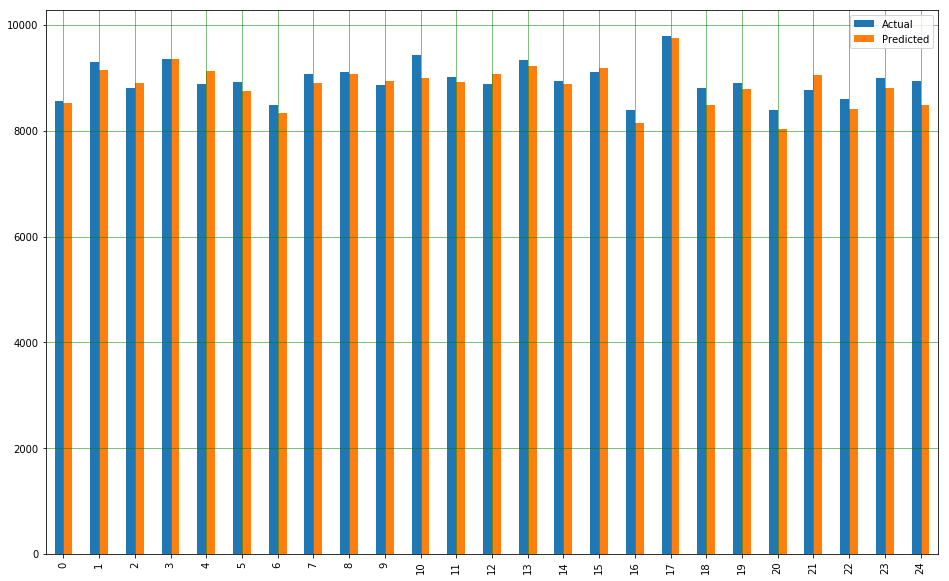

In [40]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [45]:
coeff_df = pd.DataFrame({'Coefficient':PointsReg.coef_})  
coeff_df

,Coefficient
0,1.042878
1,1.258591
2,1.128017
3,0.885767
4,-0.955387
5,0.038827
6,-0.024753
7,-0.199177
8,-0.055764


In [49]:
PointsReg.intercept_

-2050.810812774649

In [55]:
NBA.count()

SeasonEnd    835
Team         835
Playoffs     835
W            835
PTS          835
oppPTS       835
FG           835
FGA          835
2P           835
2PA          835
3P           835
3PA          835
FT           835
FTA          835
ORB          835
DRB          835
AST          835
STL          835
BLK          835
TOV          835
PTSdiff      835
dtype: int64

In [50]:
SS_Residual = sum((y-y_pred)**2)
print "Sum Squared Errors: " + str(SS_Residual)

SS_Total = sum((y-np.mean(y))**2)
print "Sum Total Errors: " + str(SS_Total)

r_squared = 1 - (float(SS_Residual))/SS_Total
print "Sum R Squared: " + str(r_squared)

adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print "Sum R Squared adjusted: " + str(adjusted_r_squared)

Sum Squared Errors: 28394313.994756684
Sum Total Errors: 281564750.0958084
Sum R Squared: 0.8991552955933052
Sum R Squared adjusted: 0.8980551715452322


In [59]:
RMSE = np.sqrt(SS_Residual/NBA.PTS.count())
print "Root Mean Squared Error: " + str(RMSE)

Root Mean Squared Error: 184.40489814749077


In [51]:
NBA.corr()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PTSdiff
SeasonEnd,1.000000e+00,-0.059128,0.000000,-0.639528,-0.632448,-0.761599,-0.684905,-0.865489,-0.867257,0.838142,0.850552,-0.513699,-0.546897,-0.702013,0.267127,-0.672123,-0.502060,-0.204162,-0.723869,3.729908e-18
Playoffs,-5.912787e-02,1.000000,0.798676,0.270601,-0.232761,0.187553,-0.011985,0.108034,-0.009932,0.028383,0.006571,0.221799,0.179413,-0.041703,0.344749,0.314705,0.173823,0.187056,-0.168602,7.745734e-01
W,0.000000e+00,0.798676,1.000000,0.298826,-0.331573,0.190396,-0.071446,0.069279,-0.087037,0.119045,0.083286,0.204906,0.161887,-0.095737,0.470897,0.320052,0.116194,0.203921,-0.243186,9.707433e-01
PTS,-6.395277e-01,0.270601,0.298826,1.000000,0.789075,0.941955,0.793979,0.825725,0.708361,-0.489949,-0.515198,0.697484,0.655059,0.496921,0.090291,0.759889,0.430990,0.152055,0.427138,3.093789e-01
oppPTS,-6.324485e-01,-0.232761,-0.331573,0.789075,1.000000,0.804467,0.830879,0.769841,0.756541,-0.562829,-0.563329,0.550588,0.537215,0.551880,-0.212627,0.542562,0.343480,0.030767,0.582413,-3.400361e-01
FG,-7.615988e-01,0.187553,0.190396,0.941955,0.804467,1.000000,0.879663,0.942920,0.859225,-0.668273,-0.688763,0.538343,0.521217,0.598591,0.008966,0.812267,0.469730,0.177503,0.517630,1.966908e-01
FGA,-6.849048e-01,-0.011985,-0.071446,0.793979,0.830879,0.879663,1.000000,0.838275,0.864859,-0.607564,-0.605596,0.391691,0.382122,0.737509,-0.050945,0.629117,0.480533,0.121097,0.449981,-7.072567e-02
2P,-8.654893e-01,0.108034,0.069279,0.825725,0.769841,0.942920,0.838275,1.000000,0.965309,-0.877866,-0.888600,0.574294,0.574543,0.683118,-0.098690,0.777113,0.489003,0.217712,0.637716,7.235925e-02
2PA,-8.672568e-01,-0.009932,-0.087037,0.708361,0.756541,0.859225,0.864859,0.965309,1.000000,-0.920732,-0.923244,0.515802,0.523757,0.765615,-0.165315,0.677708,0.490086,0.206107,0.644852,-8.672031e-02
3P,8.381421e-01,0.028383,0.119045,-0.489949,-0.562829,-0.668273,-0.607564,-0.877866,-0.920732,1.000000,0.994511,-0.508713,-0.533897,-0.665168,0.233354,-0.567859,-0.416854,-0.231074,-0.680173,1.212155e-01


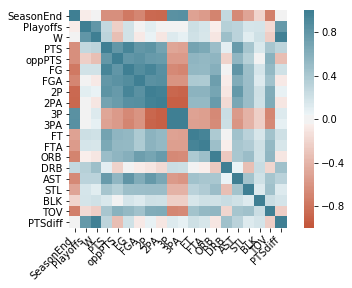

In [52]:
ax = sns.heatmap(
    NBA.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [60]:
f_regression(X, y, center=True)

import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     817.3
Date:                Tue, 17 Dec 2019   Prob (F-statistic):               0.00
Time:                        05:09:06   Log-Likelihood:                -5541.1
No. Observations:                 835   AIC:                         1.110e+04
Df Residuals:                     825   BIC:                         1.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2050.8108    203.487    -10.078      0.0

In [1]:
PointsReg = LinearRegression()  
PointsReg.fit(X, y) #training the algorithm

y_pred = PointsReg.predict(X)
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1 = df.head(25)
df1

NameError: name 'LinearRegression' is not defined